In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")
# Prepare folder to save charts for use in a PowerPoint presentation for client use.
charts_dir = "charts"
os.makedirs(charts_dir, exist_ok=True)

### Initial Data Preview

This dataset contains user survey responses with age, gender, income, and categorized expenses. Each row represents a single form submission. The columns look consistent and clearly labeled, with total expenses already pre-calculated. Timestamp is also available for potential time-based analysis.


In [3]:
# Load the CSV
df = pd.read_csv("user_data.csv")
df.head()

,timestamp,age,gender,income,utilities,entertainment,school_fees,shopping,healthcare,total_expenses
0,2025-06-17T02:54:48.867780+00:00,33,male,6000,200,0,0,0,0,200
1,2025-06-17T02:55:18.021465+00:00,55,male,7000,0,0,1000,100,200,1300
2,2025-06-17T02:57:57.172988+00:00,37,female,1600,450,100,60,400,0,1010
3,2025-06-17T02:54:48.000000+00:00,56,female,6592,860,279,1627,956,587,4309
4,2025-06-17T02:55:18.000000+00:00,46,female,8392,913,113,1081,690,8,2805


### Data Structure and Quality Check

There are 100 records and 10 columns. All fields are complete with no missing values. Data types are appropriate — income and expenses are numeric (int64), and timestamp and gender are object types. The dataset is clean and ready for analysis.


In [5]:
# Check types, missing values
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       100 non-null    object
 1   age             100 non-null    int64 
 2   gender          100 non-null    object
 3   income          100 non-null    int64 
 4   utilities       100 non-null    int64 
 5   entertainment   100 non-null    int64 
 6   school_fees     100 non-null    int64 
 7   shopping        100 non-null    int64 
 8   healthcare      100 non-null    int64 
 9   total_expenses  100 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 7.9+ KB


timestamp         0
age               0
gender            0
income            0
utilities         0
entertainment     0
school_fees       0
shopping          0
healthcare        0
total_expenses    0
dtype: int64

In [6]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Handle any missing or blank values
df = df.dropna(subset=['age', 'gender', 'income'])  # Essential fields
df.fillna(0, inplace=True)  # Fill blanks in expenses

# Ensure types
df['age'] = df['age'].astype(int)
df['income'] = df['income'].astype(float)

# Remove unrealistic values
df = df[(df['age'] >= 10) & (df['age'] <= 100)]
df = df[df['income'] > 0]

In [7]:
# Create expense ratio column
df['expense_ratio'] = df['total_expenses'] / df['income']
df['expense_ratio'] = df['expense_ratio'].round(2)

### Relationship Between Age and Income

This scatterplot shows the distribution of monthly income across different ages, grouped by gender. 

- Income values appear spread across all age groups with no obvious correlation between age and income level.
- Both male and female respondents show a wide range of income, suggesting income variation is not strictly age-dependent.
- There is no strong visual pattern linking older users to higher income in this sample.

This might indicate that income depends on other unobserved factors beyond age, such as job type or education.


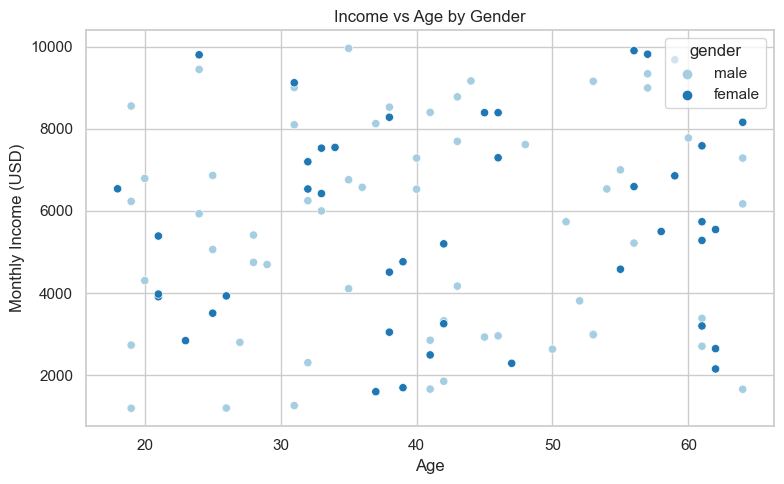

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='income', hue='gender', palette='Paired')
plt.title("Income vs Age by Gender")
plt.xlabel("Age")
plt.ylabel("Monthly Income (USD)")
plt.tight_layout()
plt.savefig(os.path.join(charts_dir, "income_vs_age_by_gender.png"))
plt.show()

### Top 10 Highest Incomes by Age and Gender

This chart displays the 10 participants with the highest reported monthly incomes. The highest incomes are spread across both male and female participants, with values approaching $10,000. Notably, high earners appear across a wide age range—from early 20s (age 24) to late 50s (age 59). This suggests that income potential is not strictly dependent on age or gender within this sample. Female participants are well-represented in the top tier, highlighting a relatively balanced distribution among top earners.

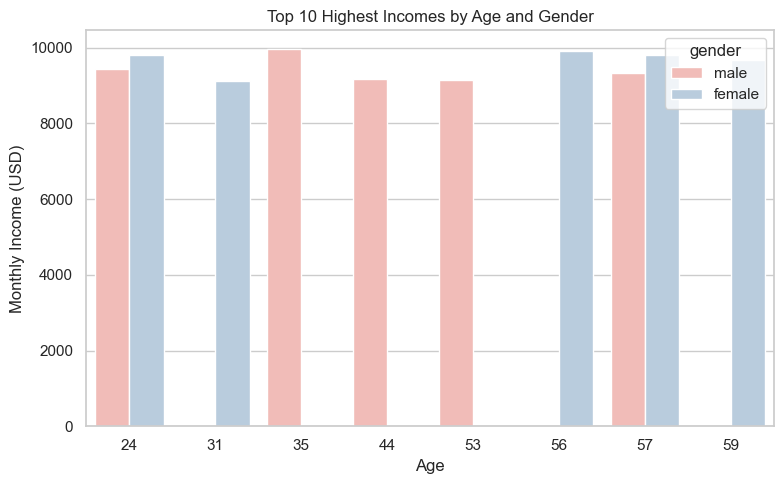

In [11]:
# Top 10 Highest Incomes by Age and Gender
top_earners = df.sort_values(by="income", ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_earners, x="age", y="income", hue="gender", palette='Pastel1')
plt.title("Top 10 Highest Incomes by Age and Gender")
plt.ylabel("Monthly Income (USD)")
plt.xlabel("Age")
plt.tight_layout()
plt.savefig(os.path.join(charts_dir, "top_income_by_age_and_gender.png"))
plt.show()

### Spending Behavior by Category and Gender

This bar chart compares total spending across expense categories by gender. 

- **School fees** have the highest total spending overall, with males spending more than females in this category.
- **Shopping** and **utilities** also show high spending across both genders, with a slight male majority.
- **Entertainment** and **healthcare** are lower in comparison, but still show similar gender trends.

This visualization helps us see where most money is going and how spending habits may differ by gender.


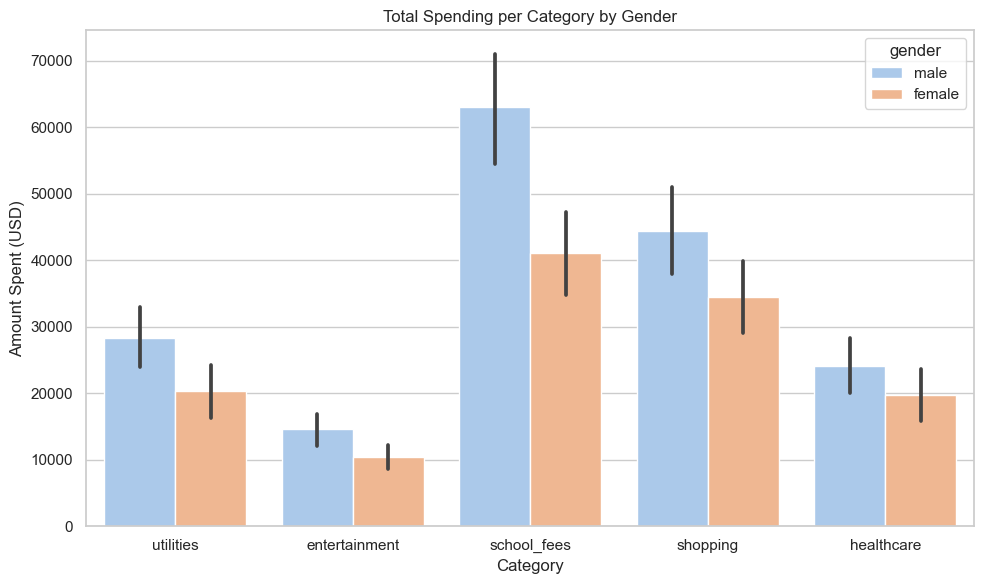

In [13]:
expense_cols = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
long_df = df.melt(id_vars='gender', value_vars=expense_cols,
                  var_name='category', value_name='amount')

plt.figure(figsize=(10,6))
sns.barplot(data=long_df, x='category', y='amount', hue='gender', palette="pastel", estimator=sum)
plt.title("Total Spending per Category by Gender")
plt.xlabel("Category")
plt.ylabel("Amount Spent (USD)")
plt.tight_layout()
plt.savefig(os.path.join(charts_dir, "total_spending_per_category_and_gender.png"))
plt.show()

### Correlation Between Income and Expenses

The heatmap shows how income and expense categories relate to one another:

- **Income** shows low to moderate correlation with any individual expense category.
- The highest correlation is between **income and total_expenses** (which is expected).
- Some weak positive correlations exist between pairs like **utilities and entertainment**, suggesting some users spend across multiple categories.

There is no strong evidence that higher income users consistently spend more in any one category — spending seems distributed.


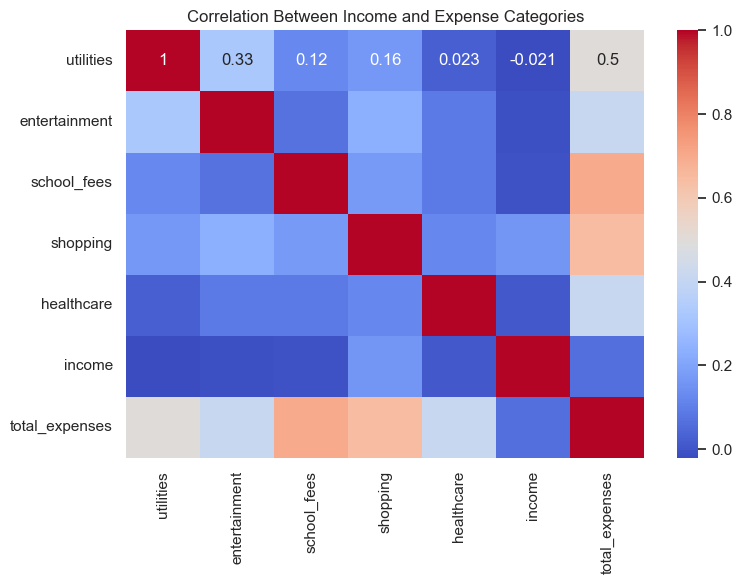

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df[expense_cols + ['income', 'total_expenses']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Income and Expense Categories")
plt.tight_layout()
plt.savefig(os.path.join(charts_dir, "correlation_income_vs_expense.png"))
plt.show()

### Expense Ratio by Income Group

This plot shows the distribution of **expense ratio** — the portion of income spent — across four income groups.

- **Low-income users** tend to spend a significantly higher share of their income. Some even report spending **more than they earn**, possibly due to debt, financial aid, or estimation errors.
- As income increases, the **expense ratio drops**, indicating greater capacity to save or manage finances more efficiently.
- **Very high-income users** consistently spend a smaller fraction of their income, with less variability across individuals.

This analysis reveals financial pressure is more visible among low-income users. It's a key insight that can guide policy or program design aimed at improving financial well-being.


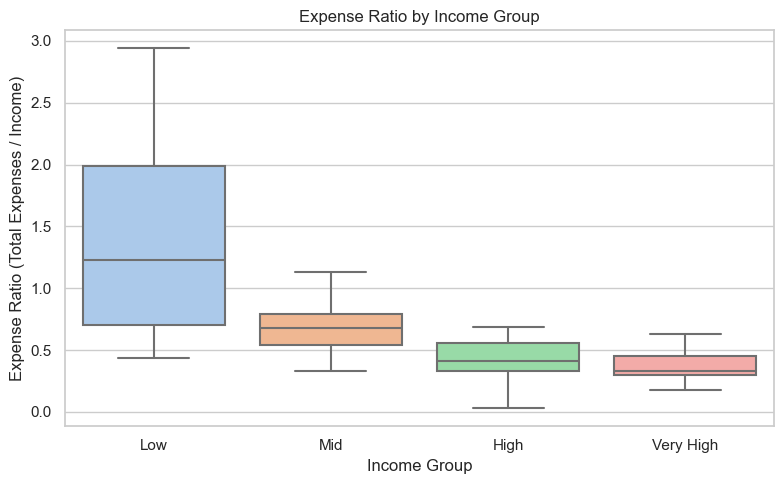

In [17]:
# Create income bins
df['income_group'] = pd.qcut(df['income'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

# Plot expense ratio by income group
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income_group', y='expense_ratio', palette='pastel')
plt.title("Expense Ratio by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Expense Ratio (Total Expenses / Income)")
plt.tight_layout()
plt.savefig(os.path.join(charts_dir, "expense_ratio_by_income_group.png"))
plt.show()

### Expense Ratio by Income Group and Gender

This visualization adds a gender breakdown to the expense ratio across income levels.

- In the **low-income group**, both males and females show a wide range of expense ratios, with many individuals spending more than they earn. This suggests potential financial stress or reliance on credit.
- **Middle-income** users show more controlled expense ratios, mostly between 0.5 and 1.0, regardless of gender.
- In the **high and very high-income** groups, spending is more predictable and typically remains below 60% of income. Differences between genders are small in these upper brackets.

This chart shows that while gender doesn't drive strong differences in expense ratios, **income level consistently impacts financial behavior**. The ability to save improves noticeably with higher income.


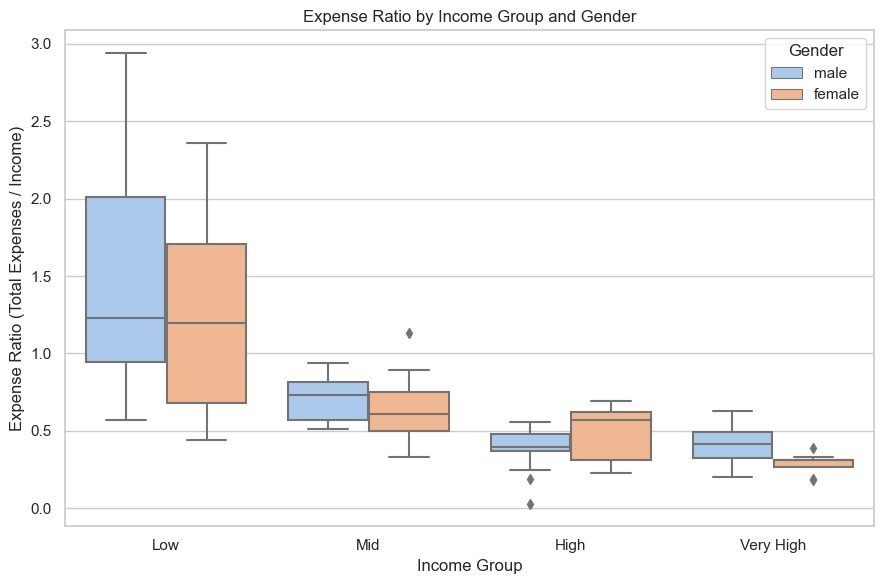

In [19]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x='income_group', y='expense_ratio', hue='gender', palette='pastel')
plt.title("Expense Ratio by Income Group and Gender")
plt.xlabel("Income Group")
plt.ylabel("Expense Ratio (Total Expenses / Income)")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig(os.path.join(charts_dir, "expense_ratio_by_income_group_and_gender.png"))
plt.show()